# Задание 2
Реализовать и использовать метод простой итерации, Якоби или Гаусса-Зейделя. Выяснить сходимость, построить график относительной невязки или ошибки по итерациям, сравнить скорость сходимости с теорией.

## Теория

Цель - решить итеративно СЛАУ вида:
$$AX=B$$

Информацию про сходимость можно найти тут:
https://maa.org/press/periodicals/loci/joma/iterative-methods-for-solving-iaxi-ibi-analysis-of-jacobi-and-gauss-seidel-methods

### Метод Якоби

Метод Якоби предлагает выразить отдельно каждую переменную в СЛАУ и, начав с какой-то точки, итеративно сойтись к решению:
$$f_i(x,y,z,\dots)=b_i\Rightarrow x = g_i(b_i,y,z,\dots)ю$$
Сам итеративный процесс будет записан в виде:
$$x_{k+1}=g_i(b_i,y_k,z_k,\dots).$$
Формула из книги:
$$x_j^{(k+1)}=\frac{b_j-a_{j1}x_1^{(k)}-\cdots-a_{jj-1}x_{j-1}^{(k)}-a_{jj+1}x_{j+1}^{(k)}-\cdots-a_{jN}x_N^{(k)}}{a_{jj}}$$
Метод Якоби заведомо сходится, если $A$ - строго диагонально доминирующая матрица.

### Метод Гаусса-Хейделя

Всё то же самое, что и в методе Якоби, но $x_{k+1}$ будет использован в следующих уравнениях:
$$x_{k+1}=g_i(b_i,y_k,z_k,\dots),$$
$$y_{k+1}=g_i(b_i,x_{k+1},z_k,\dots).$$
Формула из книги:
$$x_j^{(k+1)}=\frac{b_j-a_{j1}x_1^{(k+1)}-\cdots-a_{jj-1}x_{j-1}^{(k+1)}-a_{jj+1}x_{j+1}^{(k)}-\cdots-a_{jN}x_N^{(k)}}{a_{jj}}$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2023)

from copy import copy

Для примера рассмотрим систему:
$$\begin{matrix}
4x+y-z=13\\
x-5y-z=-8\\
2x-y-6z=-2
\end{matrix},$$
С начальным условием $P_0=(0,0,0)$. 
Матрицы $A$, $B$ имеют вид:
$$A=\left(\begin{matrix}
4 & 1 & -1 \\
1 & -5 & -1 \\
2 & -1 & -6 
\end{matrix}\right),~B=\left(\begin{matrix}
13 \\ -8 \\ -2 
\end{matrix}\right)$$

### Метод Якоби

In [2]:
A = np.array([[4, 1,-1],
              [1,-5,-1],
              [2,-1,-6]])
B = np.array([13, -8, -2])
X = [np.zeros(3)]

iter_num = 10

In [3]:
for iter in range(iter_num):
    X_next = np.zeros(3)
    for j in range(len(X[-1])):
        X_next[j] = (B[j]-\
                  np.matmul(np.delete(A[j], j), np.delete(X[-1], j)))\
                    /A[j,j]
    X.append(X_next)
print(np.array(X))

[[0.         0.         0.        ]
 [3.25       1.6        0.33333333]
 [2.93333333 2.18333333 1.15      ]
 [2.99166667 1.95666667 0.94722222]
 [2.99763889 2.00888889 1.00444444]
 [2.99888889 1.99863889 0.99773148]
 [2.99977315 2.00023148 0.99985648]
 [2.99990625 1.99998333 0.9998858 ]
 [2.99997562 2.00000409 0.99997153]
 [2.99999186 2.00000082 0.99999119]
 [2.99999759 2.00000013 0.99999715]]


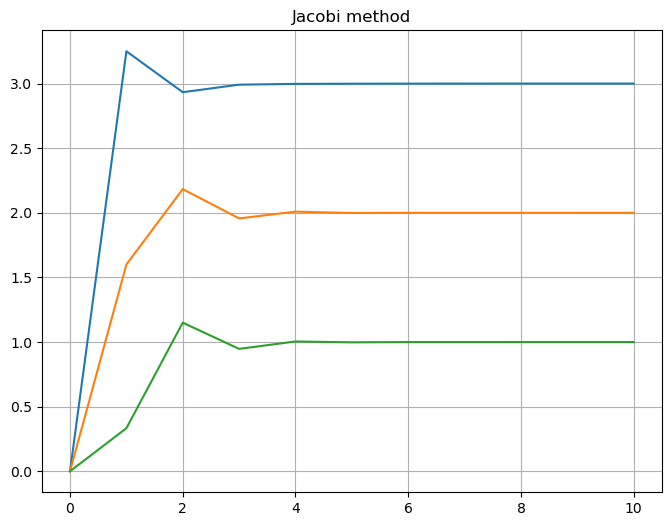

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for i in range(3):
    ax.plot(np.linspace(0,iter_num,iter_num+1), np.array(X)[:,i])

ax.set_title("Jacobi method")
ax.grid()
plt.show()

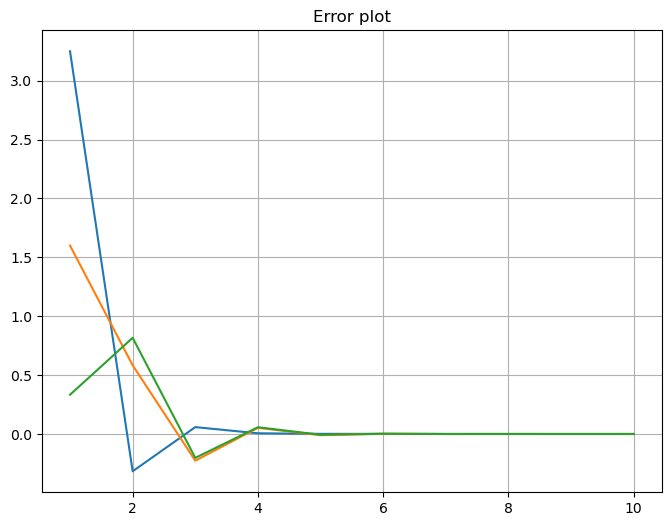

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for i in range(3):
    ax.plot(np.linspace(1,iter_num,iter_num),
             np.array(X)[1:,i] - np.array(X)[:-1,i])

ax.set_title("Error plot")
ax.grid()
plt.show()

### Метод Гаусса-Зейделя

In [6]:
A = np.array([[4, 1,-1],
              [1,-5,-1],
              [2,-1,-6]])
B = np.array([13, -8, -2])
X = [np.zeros(3)]

iter_num = 10

In [7]:
for iter in range(iter_num):
    X_next = copy(X[-1])
    for j in range(len(X[-1])):
        X_next[j] = (B[j]-\
                  np.matmul(np.delete(A[j], j), np.delete(X_next, j)))\
                    /A[j,j]
    X.append(X_next)
print(np.array(X))

[[0.         0.         0.        ]
 [3.25       2.25       1.04166667]
 [2.94791667 1.98125    0.98576389]
 [3.00112847 2.00307292 0.999864  ]
 [2.99919777 1.99986675 0.9997548 ]
 [2.99997201 2.00004344 0.99998343]
 [2.999985   2.00000031 0.99999495]
 [2.99999866 2.00000074 0.99999943]
 [2.99999967 2.00000005 0.99999988]
 [2.99999996 2.00000002 0.99999998]
 [2.99999999 2.         1.        ]]


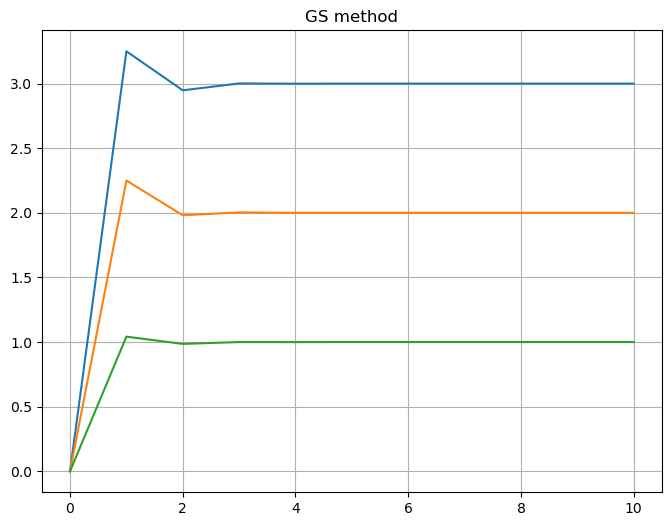

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for i in range(3):
    ax.plot(np.linspace(0,iter_num,iter_num+1), np.array(X)[:,i])

ax.set_title("GS method")
ax.grid()
plt.show()

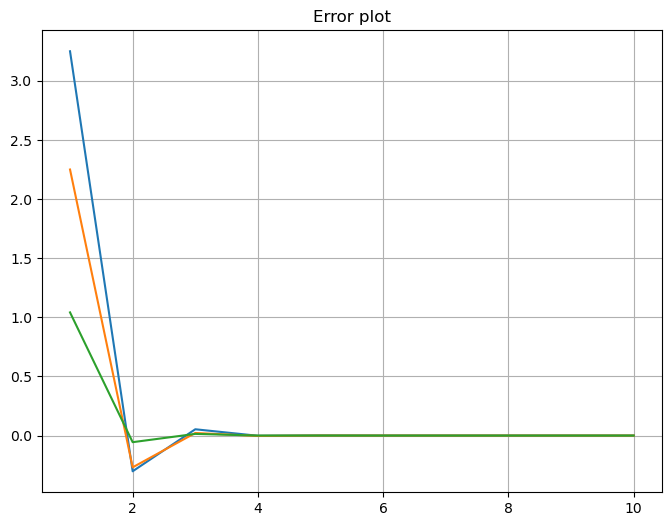

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for i in range(3):
    ax.plot(np.linspace(1,iter_num,iter_num),
             np.array(X)[1:,i] - np.array(X)[:-1,i])

ax.set_title("Error plot")
ax.grid()
plt.show()